In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from kalpana.export import fort14togdf
from kalpana.ADCIRC_tools import subsetMesh

#### Mesh subset

In this example we use ```subsetMesh``` function to remove elements from an existing mesh. Please note that this code is not used in the downscaling tools of Kalpana. We shared it becuase can be helpful for others, but it has not be extensively tested on different meshes.<br>
By now, the main assumtions are:
1. The mesh has only one open boundary
2. The open boundary is either horizontal (W-E) or vertical (S-N)

In [6]:
## this fort.14 corresponds to a simplified version of the NC6 mesh
f14org = fort14togdf(r'../../adds/inputs_examples/fort_NC.14', epsgIn=4326, epsgOut=4326, fileintype='fort.14')

In [7]:
subset = gpd.read_file(r'../../adds/inputs_examples/subset_mesh.gpkg')

<AxesSubplot: >

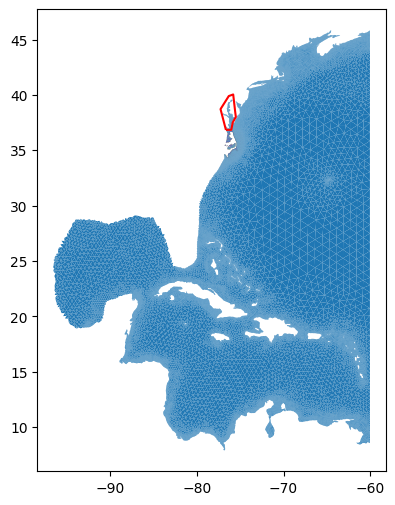

In [9]:
## visualization of the mesh and the area we want to crop
fig, ax = plt.subplots(figsize = (8, 6))
f14org.plot(ax = ax)
subset.boundary.plot(ax = ax, color = 'r')
ax.set_xlabel('Longitude [deg]')
ax.set_ylabel('Latitude [deg]')

In [10]:
## create new fort.14 with subsetMesh
f14new = subsetMesh(r'../../adds/inputs_examples/fort_NC.14',
                    r'../../adds/inputs_examples/subset_mesh.gpkg',
                    r'fort_NC_subset.14')

Mesh subset process started
  Mesh nodes as DataFrame: 0.00 min
  Mesh to GeoDataFrame: 0.10 min
  Read subdomain: 0.00 min
  Subset mesh: 0.01 min
  Read fort.14 boundary conditions: 0.00 min
  Update numbering ocean boundary condition: 0.00 min
  Update numbering closed land boundary conditions: 0.00 min
  Update numbering closed land boundary conditions: 0.15 min
  Writing new fort.14: 0.17 min
Done with fort.14 subset: 0.44 min


In [11]:
## visualization 
gdf_f14new = fort14togdf(r'../../adds/inputs_examples/fort_NC_subset.14', epsgIn=4326, epsgOut=4326, fileintype='fort.14')

Text(661.5265489294115, 0.5, 'Latitude [deg]')

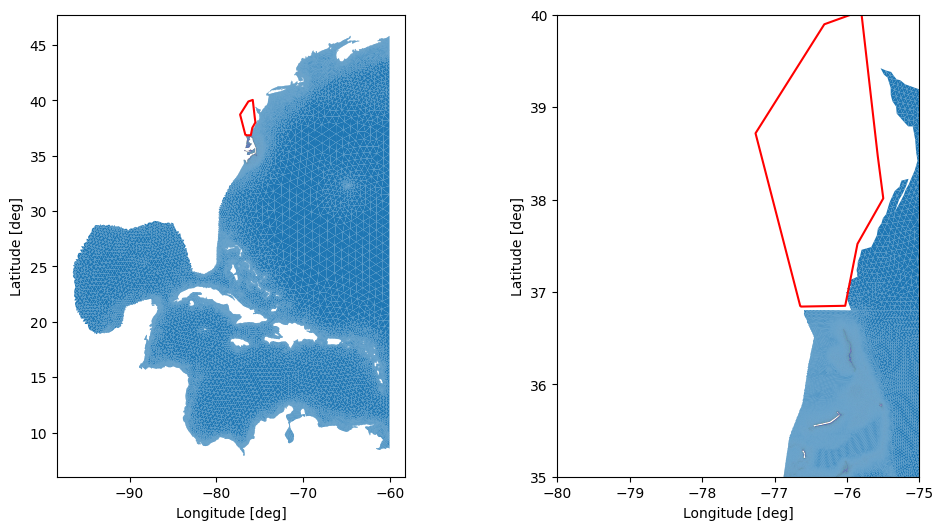

In [14]:
## right plot shows a zoom-in view to the cropped area
fig, ax = plt.subplots(figsize = (12, 6), ncols = 2)
gdf_f14new.plot(ax = ax[0])
subset.boundary.plot(ax = ax[0], color = 'r')

gdf_f14new.plot(ax = ax[1])
subset.boundary.plot(ax = ax[1], color = 'r')
ax[1].set_xlim([-80, -75])
ax[1].set_ylim([35, 40])

ax[0].set_xlabel('Longitude [deg]')
ax[0].set_ylabel('Latitude [deg]')
ax[1].set_xlabel('Longitude [deg]')
ax[1].set_ylabel('Latitude [deg]')